In [3]:
# Here we are going to make a very simple phylogenetic tree and plot for use with our example. 

In [4]:
import os
import numpy as np
import matplotlib.pyplot as plt
import pylab

from mpl_toolkits.mplot3d import Axes3D
from matplotlib import cm
from matplotlib.ticker import LinearLocator, FormatStrFormatter


In [5]:
currentDir = os.getcwd()
os.chdir('C:\\Users\\mjbaker\\Documents\\github\\instevo')
import PyInstEvo
os.chdir(currentDir)

In [6]:
Tree=np.array([1,1,1,1,1,1,2,2,2,2,1,2,3,3,3,1,2,3,4,4,1,2,3,4,5])

In [7]:
Tree=(np.reshape(Tree,(5,5)))

In [8]:
interiorbranches=PyInstEvo.branchcount(Tree)-np.shape(Tree)[0]

In [9]:
b=[-1,-1,-1,-1]

C:\Users\mjbaker\AppData\Local\Continuum\Anaconda3\lib\site-packages\matplotlib\text.py:2108: UserWarning: You have used the `textcoords` kwarg, but not the `xytext` kwarg.  This can lead to surprising results.
  warnings.warn("You have used the `textcoords` kwarg, but not "


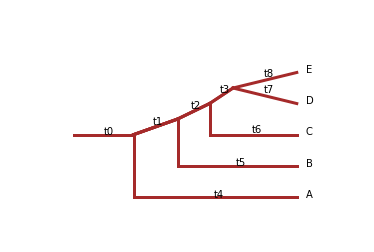

In [10]:
TFR   = PyInstEvo.timeFractions(Tree,np.matrix(b),fill=True)*5
Num   = np.matrix(np.arange(0, PyInstEvo.rows(Tree))).T
names = np.array(['A','B','C','D','E'])

minPos = PyInstEvo.J(PyInstEvo.rows(Tree), PyInstEvo.cols(Tree), np.nan)
maxPos = PyInstEvo.J(PyInstEvo.rows(Tree), PyInstEvo.cols(Tree), np.nan)
avePos = PyInstEvo.J(PyInstEvo.rows(Tree), PyInstEvo.cols(Tree), np.nan)
            
# Roll through the tree and positions point and lines accordingly.
# Also capture the point list

for i in range(0, PyInstEvo.cols(Tree)):
    m = PyInstEvo.ps(Tree, i)
    for j in range(0, PyInstEvo.rows(m)):
        bracketed = PyInstEvo.psm(Num, m, j)
        lowest = min(bracketed)
        highest = max(bracketed)
        minPos[m[j,0]:m[j,1]+1,i:i+1] = PyInstEvo.J(1 + m[j,1] - m[j,0], 1, lowest)
        maxPos[m[j,0]:m[j,1]+1,i:i+1] = PyInstEvo.J(1 + m[j,1] - m[j,0], 1, highest)
        average = np.mean(bracketed)
        avePos[m[j,0]:m[j,1]+1,i:i+1] = PyInstEvo.J(1 + m[j,1] - m[j,0], 1, average)
# Block of code to to compile tree running sums. 
            
runningsum = np.copy(TFR[:,0:1])
for i in range(1, PyInstEvo.cols(TFR)):
    runningsum=np.hstack((runningsum, np.copy(np.matrix(np.nansum(TFR[:,:i+1],axis=1)).T)))
        
        # Reorganize the numbers so that the x-axis is the depth of the tree
            
depth = np.max(runningsum)
runningsum = runningsum - depth

        # Plot the root of the tree...

begin = [-depth,-depth + TFR[0,0]]
end   = [(PyInstEvo.rows(TFR) - 1)/2,(PyInstEvo.rows(TFR) - 1)/2]
plt.plot(begin, end, color='brown', linewidth=3)
plt.annotate('t0', xy = ( (begin[0]+(begin[1]-begin[0])/2),(end[0]+(end[1]-end[0])/2) ) )

count = 1
coverdlist = []
for c in range(0, PyInstEvo.cols(TFR) - 1):
    for r in range(0, PyInstEvo.rows(Tree)):
        y = [avePos[r,c], avePos[r,c+1]]
        x = [runningsum[r,c], runningsum[r,c+1]]
        plt.plot(x, y, linewidth=3, color='brown')
        apoint = x[0]+(x[1]-x[0])/2, y[0]+(y[1]-y[0])/2        
        if (x[0] != x[1]) and apoint not in coverdlist:
            text = 't' + str(count)
            count += 1
            plt.annotate(text, xy=apoint, textcoords = "offset points")
            coverdlist.append(apoint)

plt.axis([-depth - 1,np.max(runningsum) + 1.5,-1, PyInstEvo.rows(Tree) + 1], yticks='none')

Names = list(names)        
for n in range(0, len(Names)):
    plt.annotate(Names[n][0], xy = (runningsum[n,-1] + .2, n))  
    
plt.axis('off')

pylab.savefig('AncillaryFiles\\figure1.eps', format='eps', dpi=1000, bbox_inches='tight')

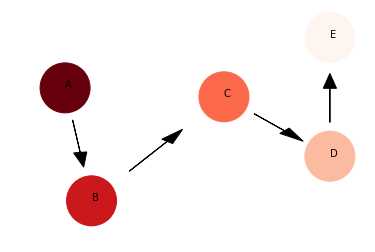

In [12]:
# Here is a sample locational plot of the groups. 

x=[3,3.1,3.6,4,4]
y=[3.66,2.9,3.6,3.2,4]
name=['A','B','C','D','E']

# Shrink factor - 

sf = 3.5

dx=[]
dy=[]
zx=[]
zy=[]

for i in range(0,len(x)-1):
    Dx = x[i+1] - x[i]
    Dy = y[i+1] - y[i]
    
    zx.append(x[i] + Dx/sf)
    zy.append(y[i] + Dy/sf)
    
    dx.append(Dx/sf)
    dy.append(Dy/sf)

s=[100,80,60,40,20]

myfig = plt.figure()                 # The figure is a figure
mypic = myfig.add_subplot(111)       # mypic is a subplot added to the figure
mypic.axis('off')                    # turns subplot axes off

mypic.scatter(x, y, c=s, s=2500, cmap="Reds")  #makes the subplot a scatterplot

# Not working...a better approach might be to handle this differently.
for i, txt in enumerate(name):
    mypic.annotate(name[i], (x[i],y[i]))     #annotates the figure

for i in range(0,len(x)-1):
    mypic.arrow(zx[i], zy[i], dx[i], dy[i], fc="k", ec="k", head_width=0.05, head_length=0.1)
    
plt.show()

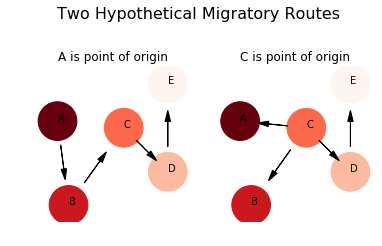

In [16]:
# Let's try a side-by-side plot... 

x=[3,3.1,3.6,4,4]
y=[3.66,2.9,3.6,3.2,4]
name=['A','B','C','D','E']

# Shrink factor - 

sf = 3.5

dx=[]
dy=[]
zx=[]
zy=[]

for i in range(0,len(x)-1):
    Dx = x[i+1] - x[i]
    Dy = y[i+1] - y[i]
    
    zx.append(x[i] + Dx/sf)
    zy.append(y[i] + Dy/sf)
    
    dx.append(Dx/sf)
    dy.append(Dy/sf)

s=[100,80,60,40,20]

myfig = plt.figure()                 # The figure is a figure
mypic = myfig.add_subplot(121, aspect='equal')       # mypic is a subplot added to the figure
mypic.axis('off')                    # turns subplot axes off

mypic.scatter(x, y, c=s, s=1500, cmap="Reds")  #makes the subplot a scatterplot

# Not working...a better approach might be to handle this differently.
for i, txt in enumerate(name):
    mypic.annotate(name[i], (x[i],y[i]))     #annotates the figure

for i in range(0,len(x)-1):
    mypic.arrow(zx[i], zy[i], dx[i], dy[i], fc="k", ec="k", head_width=0.05, head_length=0.1)
    
# Here is a sample locational plot of the groups. 

x=[3,3.1,3.6,4,4]
y=[3.66,2.9,3.6,3.2,4]
name=['A','B','C','D','E']

# Shrink factor - 

sf = 3.5

# Arrows have to be done manually for second example:

dx=[(x[0]-x[2])/sf,(x[1]-x[2])/sf,(x[3]-x[2])/sf,(x[4]-x[3])/sf]
dy=[(y[0]-y[2])/sf,(y[1]-y[2])/sf,(y[3]-y[2])/sf,(y[4]-y[3])/sf ]
zx=[x[2] + (x[0]-x[2])/sf,x[2] + (x[1]-x[2])/sf,x[2] + (x[3]-x[2])/sf,x[3] + (x[4]-x[3])/sf]
zy=[y[2] + (y[0]-y[2])/sf,y[2] + (y[1]-y[2])/sf,y[2] + (y[3]-y[2])/sf,y[3] + (y[4]-y[3])/sf]

s=[100,80,60,40,20]

mypic2 = myfig.add_subplot(122, aspect='equal')       # mypic is a subplot added to the figure
mypic2.axis('off')                    # turns subplot axes off

mypic2.scatter(x, y, c=s, s=1500, cmap="Reds")  #makes the subplot a scatterplot

# Not working...a better approach might be to handle this differently.
for i, txt in enumerate(name):
    mypic2.annotate(name[i], (x[i],y[i]))     #annotates the figure

for i in range(0,len(x)-1):
    mypic2.arrow(zx[i], zy[i], dx[i], dy[i], fc="k", ec="k", head_width=0.05, head_length=0.1)

myfig.suptitle('Two Hypothetical Migratory Routes', fontsize=16)
mypic.set_title('A is point of origin')
mypic2.set_title('C is point of origin')

plt.show()
myfig.savefig('AncillaryFiles\\figure2.eps', format='eps', dpi=1000)

<function matplotlib.pyplot.savefig>

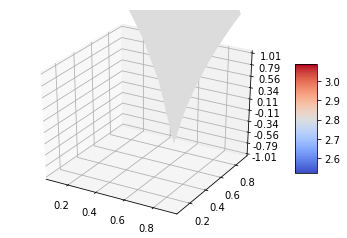

In [17]:
fig = plt.figure()
ax = fig.gca(projection='3d')
X = np.arange(0.1,1, 0.1)
Y = np.arange(0.1,1, 0.1)
X, Y = np.meshgrid(X, Y)
Z = 3*np.log(4)+np.log((1-X)*(1-X*(1-Y)))
surf = ax.plot_surface(X, Y, Z, rstride = 21, cstride = 21, cmap = cm.coolwarm, linewidth = 0)
ax.set_zlim(-1.01, 1.01)

ax.zaxis.set_major_locator(LinearLocator(10))
ax.zaxis.set_major_formatter(FormatStrFormatter('%.02f'))

fig.colorbar(surf, shrink=0.5, aspect=5)

pylab.savefig

In [23]:
4**4/(4*3*2*1)/(4**4/(4*3*2*1)+2**2/2)

0.8421052631578947

In [22]:
4**4

256